In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib  inline 

In [2]:
from sklearn.datasets import load_digits

In [5]:
# loading the digits dataset
dataset = load_digits()
list(dataset.keys())

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [6]:
print(dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Exploration des données 

In [15]:
import numpy as np

print('Target variables  : ', dataset['target_names'])

(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  [0 1 2 3 4 5 6 7 8 9]
Unique values of the target variable [0 1 2 3 4 5 6 7 8 9]
Counts of the target variable : [178 182 177 183 181 182 181 179 174 180]


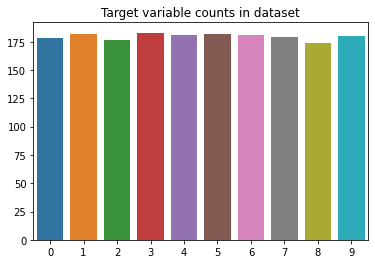

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=dataset['target_names'], y=counts)
plt.title('Target variable counts in dataset')
plt.show()

## Classification binaire avec Logistic Regression

In [22]:
# Step 1: Define explonatory variables and target variable

X = dataset['data']
y = dataset['target']

In [23]:
# Step 2:  Apply normalization operation for numerical stability

from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)


In [24]:
# Step 3: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [25]:
# Step 4: Fit a Logistic Regression Model to the train data

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [26]:
# Step 5: Make predictions on the testing data

y_pred = log_reg.predict(X_test)

print(y_pred)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 8 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]


In [27]:
y_proba = log_reg.predict_proba(X_test)
print(y_proba)

[[1.60431187e-07 1.68776102e-06 9.99977460e-01 ... 1.05648755e-05
  7.46813560e-07 3.02862229e-07]
 [8.10958593e-05 6.22908608e-04 6.56525946e-03 ... 1.36927231e-05
  8.85347425e-01 4.39997365e-04]
 [1.05633800e-10 6.78520199e-07 9.99995816e-01 ... 1.44366811e-08
  2.70602353e-08 7.26108163e-10]
 ...
 [8.52042070e-06 3.05480053e-07 1.66325819e-08 ... 6.86311460e-08
  6.11226836e-06 1.19866893e-04]
 [1.41011488e-06 8.63241443e-01 2.90409731e-04 ... 1.10408303e-05
  9.13773144e-02 6.64673686e-06]
 [4.40032549e-05 1.04528558e-08 2.20654520e-07 ... 1.79475517e-06
  6.06047951e-05 9.98743434e-01]]


## Evaluation de la perfomance du modèle

### Accuracy Score¶

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9666666666666667

### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

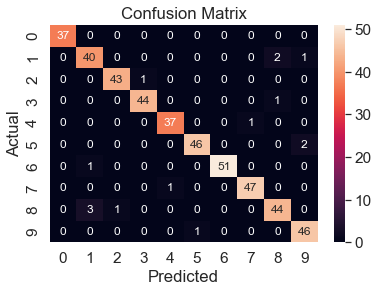

In [33]:
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

sns.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size

## Averaging strategies

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print('macro-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('micro-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='micro')))
print('weighted-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('macro-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('micro-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='micro')))
print('weighted-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('macro-averaging F1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='macro')))
print('micro-averaging F1_measureF1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='micro')))
print('weighted-averaging F1_measureF1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='weighted')))

macro-averaging Recall = 0.967
micro-averaging Recall = 0.967
weighted-averaging Recall = 0.967
macro-averaging Precision = 0.967
micro-averaging Precision = 0.967
weighted-averaging Precision = 0.967
macro-averaging F1_measure = 0.967
micro-averaging F1_measureF1_measure = 0.967
weighted-averaging F1_measureF1_measure = 0.967


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.98      0.98        44
           3       0.98      0.98      0.98        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.98      0.98        48
           8       0.94      0.92      0.93        48
           9       0.94      0.98      0.96        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



## "Softmax Regression" pour la classification 

In [36]:
softmax_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.98      0.98        44
           3       0.98      0.98      0.98        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.98      0.98        48
           8       0.94      0.92      0.93        48
           9       0.94      0.98      0.96        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [37]:
print('macro-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('micro-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='micro')))
print('weighted-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('macro-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('micro-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='micro')))
print('weighted-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('macro-averaging F1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='macro')))
print('micro-averaging F1_measureF1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='micro')))
print('weighted-averaging F1_measureF1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='weighted')))

macro-averaging Recall = 0.967
micro-averaging Recall = 0.967
weighted-averaging Recall = 0.967
macro-averaging Precision = 0.967
micro-averaging Precision = 0.967
weighted-averaging Precision = 0.967
macro-averaging F1_measure = 0.967
micro-averaging F1_measureF1_measure = 0.967
weighted-averaging F1_measureF1_measure = 0.967
